In [1]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestClassifier


#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.utils.class_weight import compute_class_weight

from joblib import parallel_backend
from joblib import Parallel, delayed


In [2]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/models/rfc_WTvdcr_comb_set1_v1.pkl'
# load the model from disk
rfc_set1 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [3]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


dcr_srWT_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/rubyRF/WT_dcr_red/predRF/dcrWT_SRWT_pr_set2_df.txt',header=0,sep='\t')


np.shape(dcr_srWT_df)


shuf_comb_df=dcr_srWT_df.iloc[np.random.permutation(len(dcr_srWT_df))]



shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()


loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2762728 entries, 0 to 2762727
Data columns (total 23 columns):
 #   Column   Dtype  
---  ------   -----  
 0   seq_id   object 
 1   5p       int64  
 2   3p       int64  
 3   strand   int64  
 4   ptype    int64  
 5   length   int64  
 6   gc_cont  float64
 7   AA       int64  
 8   AC       int64  
 9   AG       int64  
 10  AT       int64  
 11  CA       int64  
 12  CC       int64  
 13  CG       int64  
 14  CT       int64  
 15  GA       int64  
 16  GC       int64  
 17  GG       int64  
 18  GT       int64  
 19  TA       int64  
 20  TC       int64  
 21  TG       int64  
 22  TT       int64  
dtypes: float64(1), int64(21), object(1)
memory usage: 484.8+ MB


In [4]:
ydt=shuf_comb_df['ptype']

xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [5]:
with parallel_backend('threading',n_jobs=32 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    y_pred = rfc_set1.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [6]:
from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))


prediction accuracy score : 0.7455

Classification report :
               precision    recall  f1-score   support

           0       0.83      0.77      0.80   1797447
           1       0.62      0.70      0.66    965281

    accuracy                           0.75   2762728
   macro avg       0.72      0.73      0.73   2762728
weighted avg       0.75      0.75      0.75   2762728



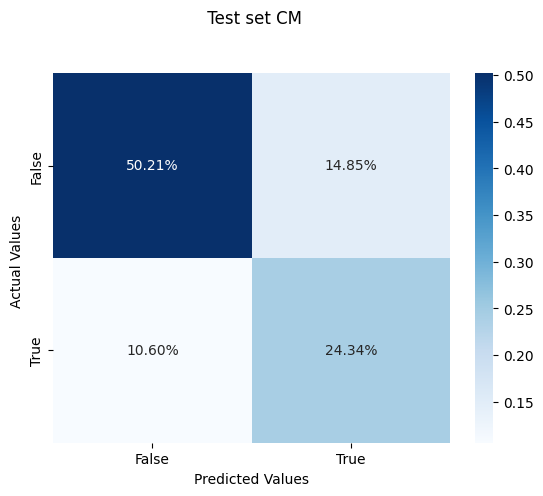

In [8]:
# #####################################  CONFUSION MATRIX for pred set   ########################################################################
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_dcrWT_set1_predset2_v1.pdf")